# order_items_dataset

### Key Columns:
- *price*
- *freight_value*

### Foreign Keys:
- *order_id* -> **orders_dataset** NOT UNIQUE VALUES IN THE FOREIGN KEY!!! (**82 951** UNIQUE AFTER PREPROCESSING out of 95092 -> **group_by** [mean of price and freight] or drop_duplicates)
- *product_id* -> **products_dataset** NOT UNIQUE VALUES IN THE FOREIGN KEY!!! (**27 570** UNIQUE AFTER PREPROCESSING)
- *seller_id* -> **sellers_dataset** NOT UNIQUE VALUES IN THE FOREIGN KEY!!! (**2789** UNIQUE AFTER PREPROCESSING)

### Key Findings:
- both *price* and *freight_value* have several outliers, the columns are uncorrelated (linearly)
- there are no missing values
- the column *payment_value* from **order_payments_dataset** is the sum of *price* and *freight_value* from this table

### Preprocessing steps:
- remove outliers from *price* and *freight_value* columns
- change the type of the *shipping_limit_date* to datetime

### Issues:
- foreign keys: *order_id* and *product_id* and *seller_id* do not have unique values
- we assume that *freight_value* column is the cost of a customer associated with shipping the specific order item
- *shipping_limit_date* seems to be the deadline for the seller to process and ship the item which will probably not be very significant during our analysis

$15.69\%$ of data has been deleted

## EDA

In [ ]:
from utils import check_functions, visuals, cleaning, preprocessing

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline

In [ ]:
order_items_dataset = pd.read_csv('../data/raw/order_items_dataset.csv')
order_items_dataset

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


In [4]:
order_items_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [5]:
check_functions.missing_values(order_items_dataset)

,Column,Missing Values
0,order_id,0
1,order_item_id,0
2,product_id,0
3,seller_id,0
4,shipping_limit_date,0
5,price,0
6,freight_value,0


In [6]:
check_functions.nunique_values(order_items_dataset)

,Column,Nunique
0,order_id,98666
1,order_item_id,21
2,product_id,32951
3,seller_id,3095
4,shipping_limit_date,93318
5,price,5968
6,freight_value,6999


In [7]:
check_functions.duplicates(order_items_dataset)

There are no duplicates.


In [8]:
numerical_summary, object_summary = check_functions.summarize(order_items_dataset)

In [9]:
numerical_summary

,count,mean,std,min,25%,50%,75%,max
order_item_id,112650.0,1.197834,0.705124,1.00,1.00,1.00,1.00,21.00
price,112650.0,120.653739,183.633928,0.85,39.90,74.99,134.90,6735.00
freight_value,112650.0,19.990320,15.806405,0.00,13.08,16.26,21.15,409.68


In [10]:
object_summary

,count,unique,top,freq
order_id,112650,98666,8272b63d03f5f79c56e9e4120aec44ef,21
product_id,112650,32951,aca2eb7d00ea1a7b8ebd4e68314663af,527
seller_id,112650,3095,6560211a19b47992c3666cc44a7e94c0,2033
shipping_limit_date,112650,93318,2017-07-21 18:25:23,21


c:\Users\jk200\Desktop\Ehhh\Coding\Machine Learning\Project2\eda\eda_utils\visuals.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


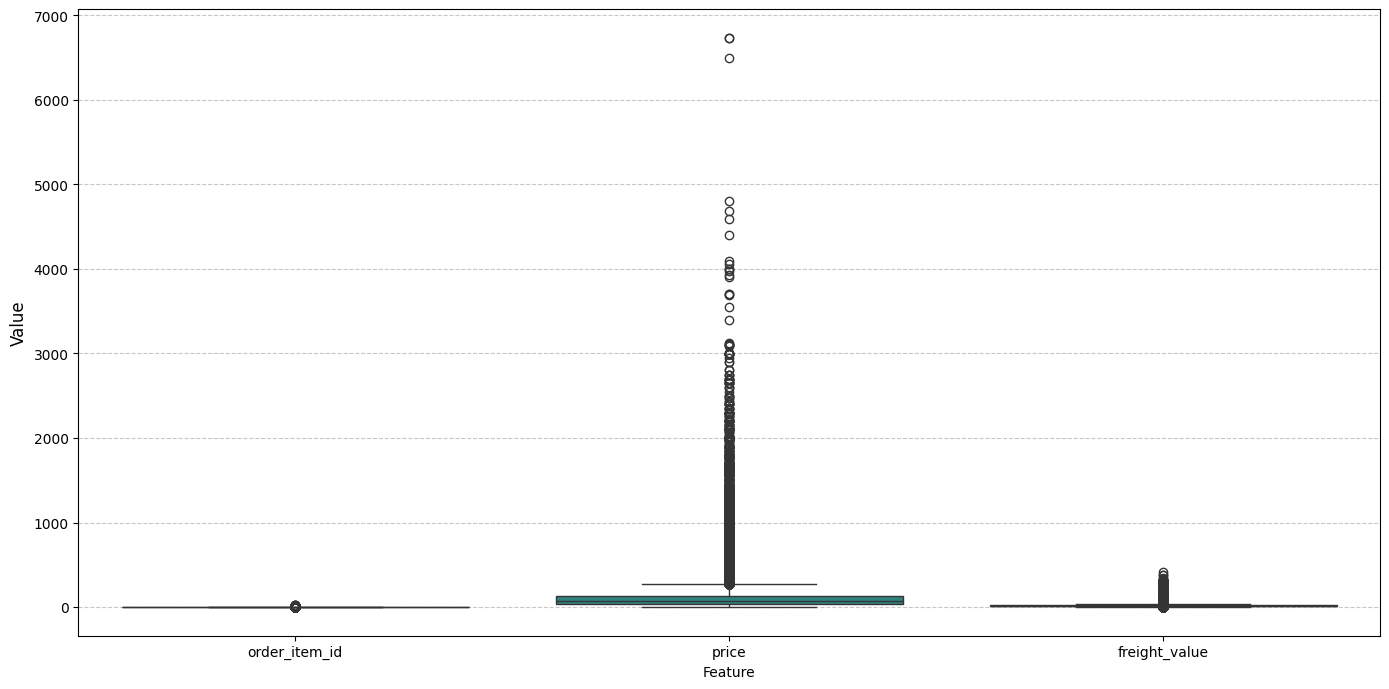

In [11]:
visuals.boxplots(order_items_dataset, ['order_item_id', 'price', 'freight_value'])

Looks bad... There are several outliers.

In [12]:
check_functions.outliers(order_items_dataset, ['order_item_id', 'price', 'freight_value'])

,Outlier Count,Outlier Percentage (%)
Column,,
order_item_id,13984,12.413671
freight_value,12134,10.771416
price,8427,7.480692


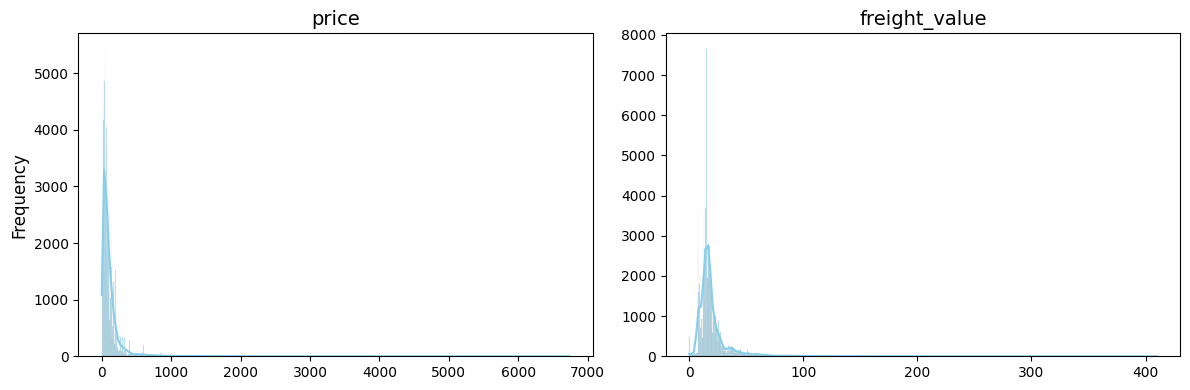

In [13]:
visuals.histograms(order_items_dataset, ['price', 'freight_value'])

Most of the products are up to $1000$ BRL (Brazilian currency), with a few outliers that are more expensive (max $6735$). In terms of the *freight_value*, mostly it is around $17$ BRL but some outliers achieve the value of over $400$ BRL.

Let's also take a look at the distribution of the sum of *price* and *freight_value*:

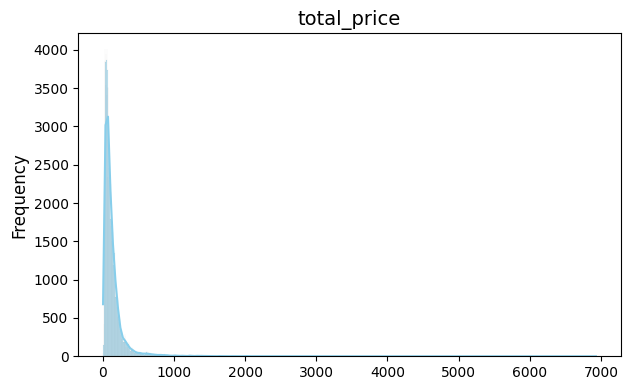

In [14]:
new_df = pd.DataFrame({"total_price": order_items_dataset['price'] + order_items_dataset['freight_value']})
visuals.histograms(new_df, ["total_price"])

Visibly, the outliers artificially increase the mean out of where the most data points are located.

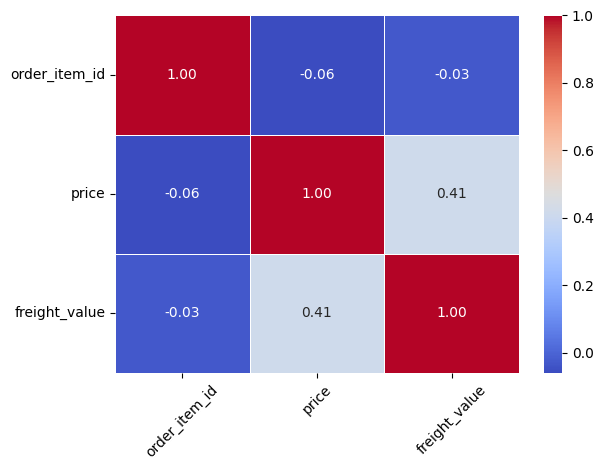

In [15]:
visuals.correlations(order_items_dataset, ['order_item_id', 'price', 'freight_value'])

None of the variables are strongly correlated.

C:\Users\jk200\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\jk200\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\jk200\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\jk200\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:1615: UserWarning: 

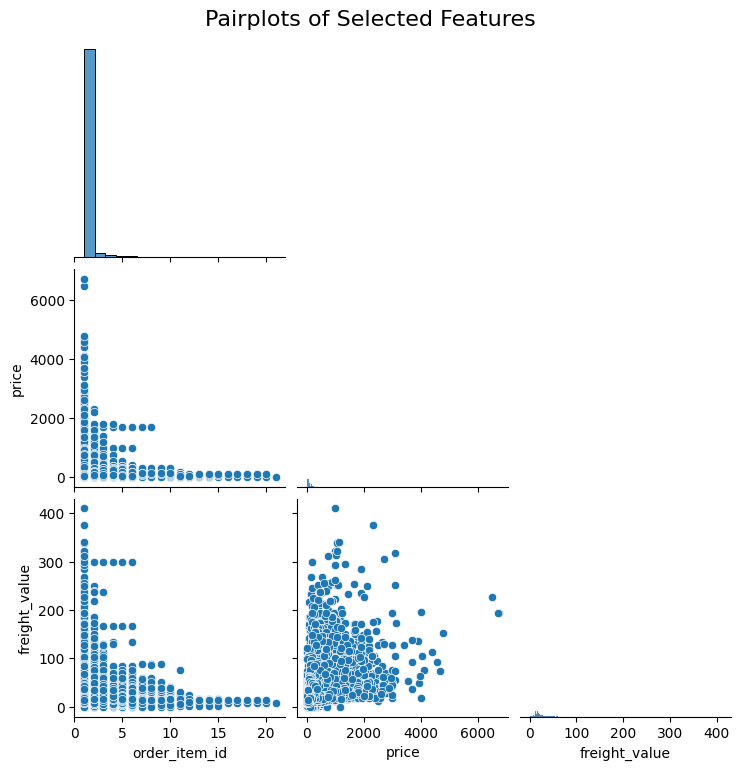

In [16]:
visuals.pairplots(order_items_dataset, ['order_item_id', 'price', 'freight_value'])

Most of the data is located in the lower range of the *price* and *freight_value* columns. The *order_item_id* column is not correlated with the *price* and *freight_value* columns. The *price* and *freight_value* columns seem to be positively correlated (probably not linearly, or maybe)?

## Data cleaning & Preliminary Preprocessing

Here, we remove outliers from *price* and *freight_value* columns, change the type of the *shipping_limit_date* to datetime. We could also create a new column as the sum of *price* and *freight_value* but such column already exists in the **order_payments** table.

In [ ]:
pipeline = make_pipeline(
    cleaning.OutlierRemover_IQR(columns=['price', 'freight_value']),
    preprocessing.DataTypeTransformer({'shipping_limit_date': 'datetime64'})
)

In [11]:
order_items_dataset_final = pipeline.fit_transform(order_items_dataset)
order_items_dataset_final

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14
...,...,...,...,...,...,...,...
112639,fffb2ef8874127f75b52b643880fd7e0,1,ebceb9726cf5c6187b48e17fe58747b0,609e1a9a6c2539919b8205cf7c4e6ff0,2018-04-09 05:08:33,17.90,22.06
112644,fffbee3b5462987e66fb49b1c5411df2,1,6f0169f259bb0ff432bfff7d829b9946,213b25e6f54661939f11710a6fddb871,2018-06-28 09:58:03,119.85,20.03
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72


$15.69\%$ of data has been deleted.

In [12]:
order_items_dataset_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 95092 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_id             95092 non-null  object        
 1   order_item_id        95092 non-null  int64         
 2   product_id           95092 non-null  object        
 3   seller_id            95092 non-null  object        
 4   shipping_limit_date  95092 non-null  datetime64[ns]
 5   price                95092 non-null  float64       
 6   freight_value        95092 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 5.8+ MB


The datatypes changed as expected, so that if in the analysis, there will be the need to join two tables and calculate **timedelta** between two columns, this will be possible.

In [ ]:
# order_items_dataset_final.to_csv("../data/after/order_items_dataset_done.csv")